# Desafío - Análisis lineal discriminante (Sebastián Rebolledo)

### Ejercicio 1: Preparación de ambiente de trabajo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv('default_credit.csv').drop(['index'], axis=1)

In [3]:
df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


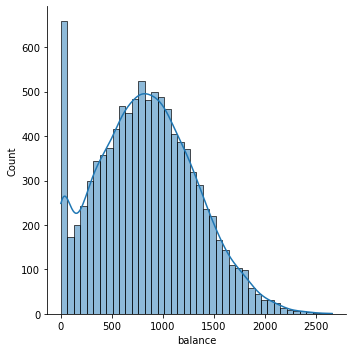

In [4]:
sns.displot(df['balance'], kde=True)

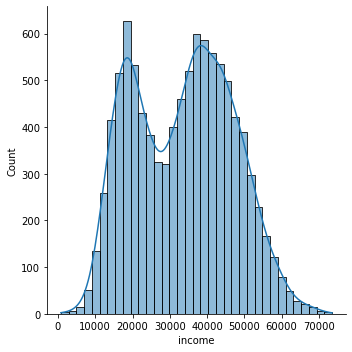

In [5]:
sns.displot(df['income'], kde=True)

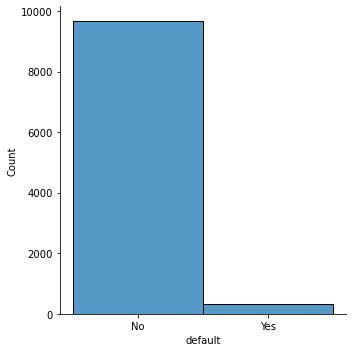

In [6]:
sns.displot(df['default'])

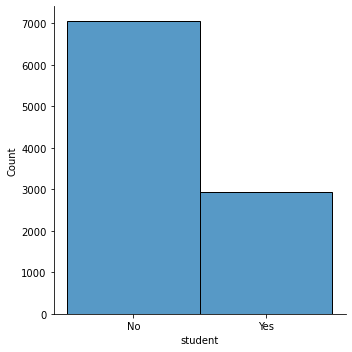

In [7]:
sns.displot(df['student'])

### Ejercicio 2: Modelo base

In [8]:
df['student']=LabelEncoder().fit_transform(df['student'])
df['default']=LabelEncoder().fit_transform(df['default'])

In [9]:
df

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
...,...,...,...,...
9995,0,0,711.555020,52992.378914
9996,0,0,757.962918,19660.721768
9997,0,0,845.411989,58636.156984
9998,0,0,1569.009053,36669.112365


0 = No y 1=Yes

In [10]:
x=df.loc[:,['student', 'balance','income']]
y=df['default']
X_train_mat, X_test_mat, y_train_vec, y_test_vec = train_test_split(x,y,test_size=0.33, random_state=1534)

In [11]:
lda_model = LinearDiscriminantAnalysis()

In [12]:
lda_model.fit(X_train_mat, y_train_vec)

LinearDiscriminantAnalysis()

In [13]:
lda_model_pred= lda_model.predict(X_test_mat)

In [14]:
cf_matrix = confusion_matrix(y_test_vec, lda_model_pred)/len(y_test_vec)

In [15]:
cf_matrix

array([[0.95787879, 0.00181818],
       [0.03060606, 0.00969697]])

In [16]:
print(classification_report(y_test_vec, lda_model_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3167
           1       0.84      0.24      0.37       133

    accuracy                           0.97      3300
   macro avg       0.91      0.62      0.68      3300
weighted avg       0.96      0.97      0.96      3300



#### Se observa una gran diferencia entre las clases, la frecuencia de la clase 0 es casi 30 veces mayor que la de la clase 1. Por lo que el  modelo esta prediciendo solo la clase 0.
#### Con respecto a la clase 1, el modelo solo logra identificar ciertos ejemplos con las caracteristicas bien marcadas. 

### Ejercicio 3: Refactorización 1 - información a priori

In [17]:
lda_model.priors_

array([0.97014925, 0.02985075])

#### Priori 50 y 50

In [18]:
lda_model_2 = LinearDiscriminantAnalysis(priors=[0.5,0.5])

In [19]:
lda_model_2.fit(X_train_mat, y_train_vec)

LinearDiscriminantAnalysis(priors=[0.5, 0.5])

In [20]:
y_hat_model_2 = lda_model_2.predict(X_test_mat)

In [21]:
y_hat_model_2

array([0, 0, 1, ..., 0, 0, 1])

In [22]:
print(classification_report(y_test_vec, y_hat_model_2))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3167
           1       0.19      0.90      0.31       133

    accuracy                           0.84      3300
   macro avg       0.59      0.87      0.61      3300
weighted avg       0.96      0.84      0.89      3300



#### En la clase 1 aumento el recall y disminuyo la precision, lo que significa que el algoritmo esta prediciendo solo una clase y no la otra, por lo que encuentra a la mayoria de los datos de la clase 1, pero no acierta en la predicción.

#### Priori 60/40

In [23]:
lda_model_3 = LinearDiscriminantAnalysis(priors=[0.4,0.6])

In [24]:
lda_model_3.fit(X_train_mat, y_train_vec)

LinearDiscriminantAnalysis(priors=[0.4, 0.6])

In [25]:
y_hat_model_3 = lda_model_3.predict(X_test_mat)

In [26]:
print(classification_report(y_test_vec, y_hat_model_3))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      3167
           1       0.15      0.92      0.26       133

    accuracy                           0.79      3300
   macro avg       0.57      0.85      0.57      3300
weighted avg       0.96      0.79      0.85      3300



#### Se repite lo mismo que en el caso anterior, el modelo sigue prediciendo la clase 0.

### Ejercicio 4: Refactorización 2 - oversampling

In [27]:
oversampler = SMOTE(random_state=13545, sampling_strategy='minority')
X_train_oversamp, y_train_oversamp = oversampler.fit_resample(X_train_mat,y_train_vec)

In [28]:
lda_model_os =  LinearDiscriminantAnalysis()

In [29]:
lda_model_os.fit(X_train_oversamp, y_train_oversamp)

LinearDiscriminantAnalysis()

In [30]:
y_hat_model_os = lda_model_os.predict(X_test_mat)

In [31]:
print(classification_report(y_test_vec, y_hat_model_os))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      3167
           1       0.19      0.89      0.31       133

    accuracy                           0.84      3300
   macro avg       0.59      0.87      0.61      3300
weighted avg       0.96      0.84      0.89      3300



#### No se observan mejoras comparado con los modelos anteriores.

In [32]:
X_train_mat

,student,balance,income
7543,1,753.383574,12258.604512
7216,1,649.530745,13408.662947
2714,0,0.000000,62886.709228
9575,0,808.494794,56204.663014
721,1,436.008314,17504.447773
...,...,...,...
8425,0,953.391789,20749.338159
6349,1,385.430994,21619.663412
4019,1,1215.383610,15994.041024
3405,0,696.510067,28610.194659


### Ejercicio 5: Refactorización 3 - QDA

In [33]:
qda_model = QuadraticDiscriminantAnalysis().fit(X_train_oversamp, y_train_oversamp)

In [34]:
y_hat_qda = qda_model.predict(X_test_mat)

In [35]:
print(classification_report(y_test_vec, y_hat_qda))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      3167
           1       0.22      0.87      0.35       133

    accuracy                           0.87      3300
   macro avg       0.61      0.87      0.64      3300
weighted avg       0.96      0.87      0.90      3300



In [36]:
confusion_matrix(y_test_vec, y_hat_qda)/len(y_test_vec)

array([[0.83515152, 0.12454545],
       [0.00515152, 0.03515152]])

#### No se observan cambios con respecto a los modelos anteriores, el modelo sigue desvalanceado, pese a utilizar oversampling, el modelo continua prediciendo solo la clase con mayor frecuencia (Clase 0).

#### Entre todos los modelos realizados, el que tiene un mejor desempeño es el ultimo, ya que se logra identificar a una gran parte de los atributos perteneciente a la clase 1(87%), y el modelo acierta en un 22% en su predicción. 
#### Con respecto a la clase 0 en este ultimo modelo, se aumento el valor de recall, lo que significa que el modelo es capaz de identificar más caracteristicas de esta clase. 
